# Prédire la température à l'aide d'une régression linéaire

 https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f



In [1]:
# On importe les librairies
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# CHARGER UN DATASET CSV DE PLUSIEURS COLONNES
dataset = pd.read_csv('dataset/Weather.csv')

C:\Users\secretgirl\AppData\Local\Temp\ipykernel_14696\4010322962.py:2: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('dataset/Weather.csv')


In [3]:
# INFOS SUR LE FICHIERS 19040 rows and 31 columns.
print(dataset.shape) 

# STATS SUR LE FICHIER
print(dataset.describe())


(119040, 31)
                 STA  WindGustSpd        MaxTemp        MinTemp  \
count  119040.000000   532.000000  119040.000000  119040.000000   
mean    29659.435795    37.774534      27.045111      17.789511   
std     20953.209402    10.297808       8.717817       8.334572   
min     10001.000000    18.520000     -33.333333     -38.333333   
25%     11801.000000    29.632000      25.555556      15.000000   
50%     22508.000000    37.040000      29.444444      21.111111   
75%     33501.000000    43.059000      31.666667      23.333333   
max     82506.000000    75.932000      50.000000      34.444444   

            MeanTemp             YR             MO             DA          DR  \
count  119040.000000  119040.000000  119040.000000  119040.000000  533.000000   
mean       22.411631      43.805284       6.726016      15.797530   26.998124   
std         8.297982       1.136718       3.425561       8.794541   15.221732   
min       -35.555556      40.000000       1.000000       1.

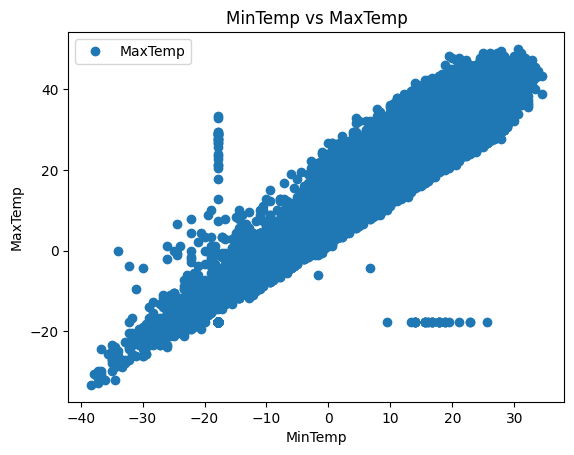

C:\Users\secretgirl\AppData\Local\Temp\ipykernel_14696\1438421749.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seabornInstance.distplot(dataset['MaxTemp'])


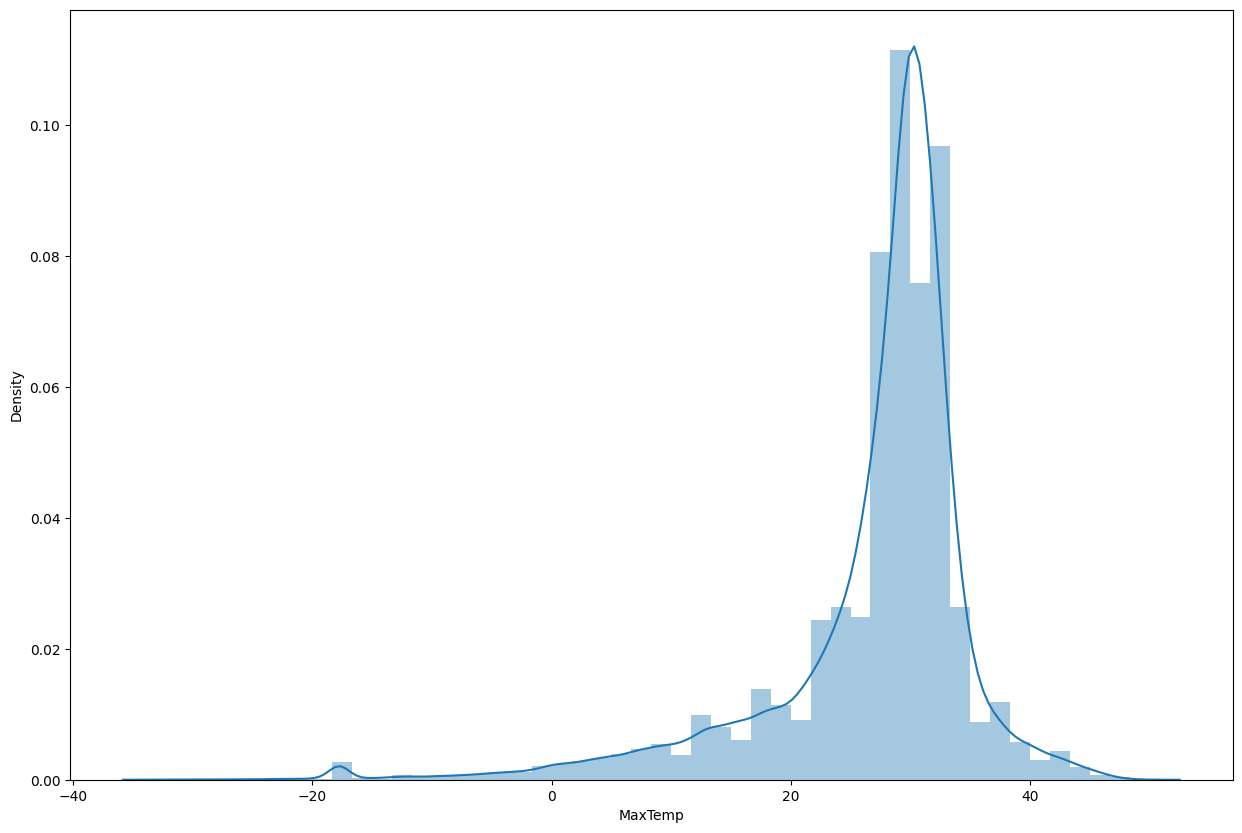

In [4]:
# CREER UN NUAGE DE POINTS AVEC MIN TEMPERATURE EN ABSCISSE ET MAX TEMPERATURE EN ORDONNEE
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()


# TEMPERATURE MAX MOYENNE
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])
plt.show()

In [5]:
# On veut prédire la maxtemp en fonction de la mintemp
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)


In [6]:
# Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
# The test_size variable is where we actually specify the proportion of the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm


LinearRegression()

[10.66185201]
[[0.92033997]]
          Actual  Predicted
0      28.888889  33.670351
1      31.111111  30.091251
2      27.222222  26.512151
3      28.888889  31.113851
4      23.333333  15.774852
...          ...        ...
23803  32.777778  32.136451
23804  32.222222  29.068651
23805  31.111111  32.647751
23806  31.111111  30.602551
23807  36.666667  31.625151

[23808 rows x 2 columns]


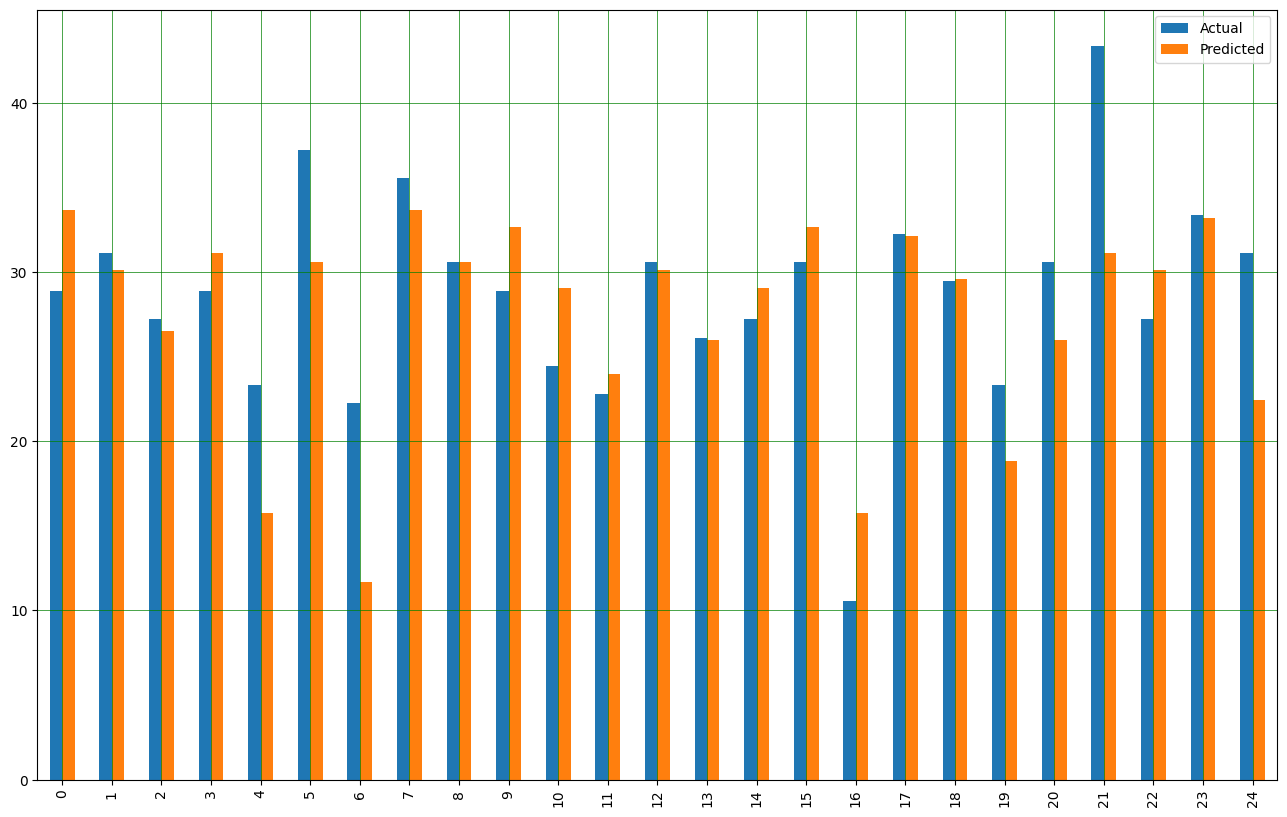

In [7]:
# Comme nous l'avons vu, le modèle de régression linéaire trouve essentiellement la meilleure valeur pour l'ordonnée à l'origine et la pente, ce qui donne une ligne qui correspond le mieux aux données. Pour voir la valeur de l'interception et de la pente calculées par l'algorithme de régression linéaire pour notre jeu de données, exécutez le code suivant.
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)


# On prédit les températures max en fonction des températures min présentes dans le tableau, 
# puis on compare nos prédictions par rapport aux données réelles qui ont été relevées .
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

# Nous pouvons également visualiser le résultat de la comparaison sous forme de graphique à barres en utilisant le script ci-dessous:

# Remarque: Comme le nombre d'enregistrements est énorme, à des fins de représentation, je ne prends que 25 enregistrements.
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
